In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression

In [2]:
train = pd.read_csv('c:/users/HP/Desktop/titanic/train.csv')
test = pd.read_csv('c:/users/HP/Desktop/titanic/test.csv')

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
null_cols = train.columns[train.isnull().any()]
null_cols

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [6]:
a = train.isnull().sum()
a[a>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
b = test.isnull().sum()
b[b>0]

Age       86
Fare       1
Cabin    327
dtype: int64

## Visualization of data

In [8]:
import seaborn as sns

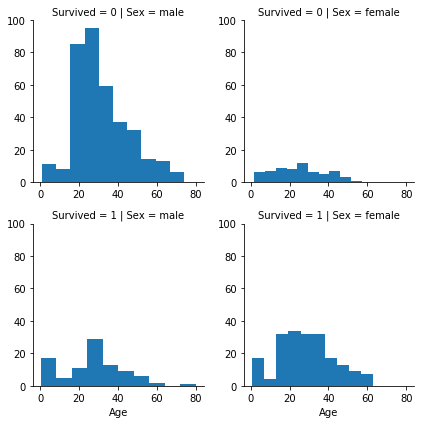

In [9]:
g = sns.FacetGrid(train,col = 'Sex',row = 'Survived')
g.map(plt.hist,'Age')


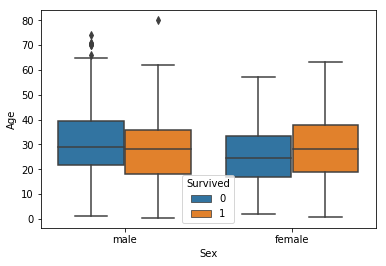

In [10]:
sns.boxplot(x= 'Sex',y = 'Age',hue  = 'Survived',data = train)

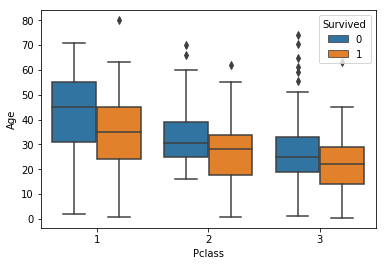

In [11]:
sns.boxplot(x = 'Pclass',y = 'Age',hue = 'Survived',data =train)

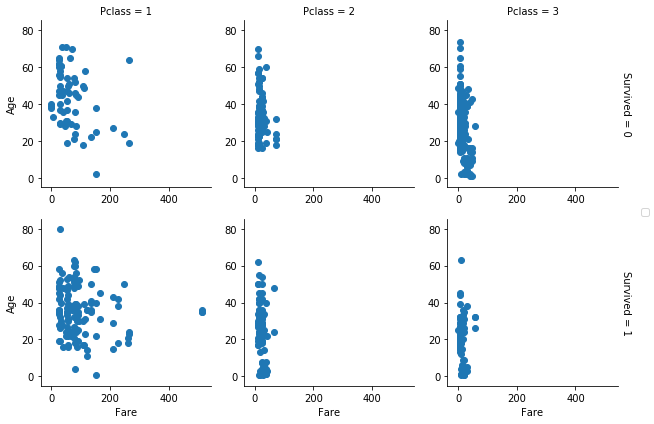

In [12]:
g = sns.FacetGrid(train,'Survived',col = 'Pclass',margin_titles=True,palette={1:"green",0:"red"})
g = g.map(plt.scatter,'Fare','Age').add_legend();

Text(0.5,1,'passengers/boarding location')

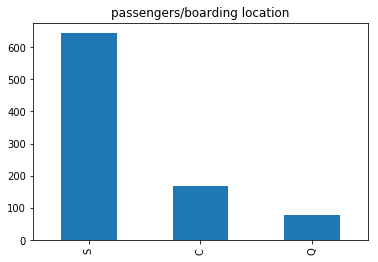

In [13]:
train.Embarked.value_counts().plot(kind = 'bar')
plt.title('passengers/boarding location')

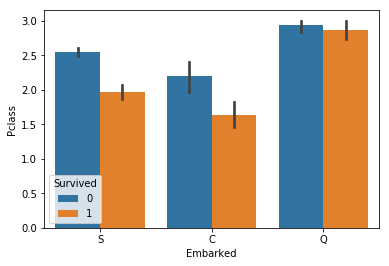

In [14]:
sns.barplot('Embarked','Pclass',hue = 'Survived',data = train)

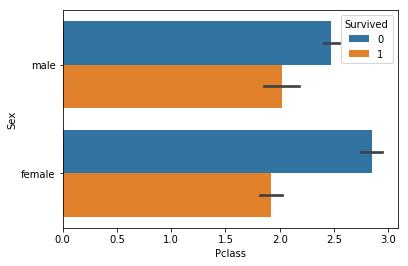

In [15]:
sns.barplot('Pclass','Sex',hue = 'Survived',data=train)

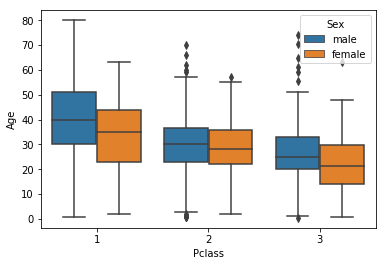

In [16]:
sns.boxplot('Pclass','Age',data= train,hue = 'Sex')

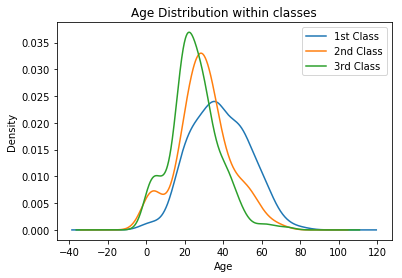

In [17]:
train.Age[train.Pclass == 1].plot(kind='kde')    
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

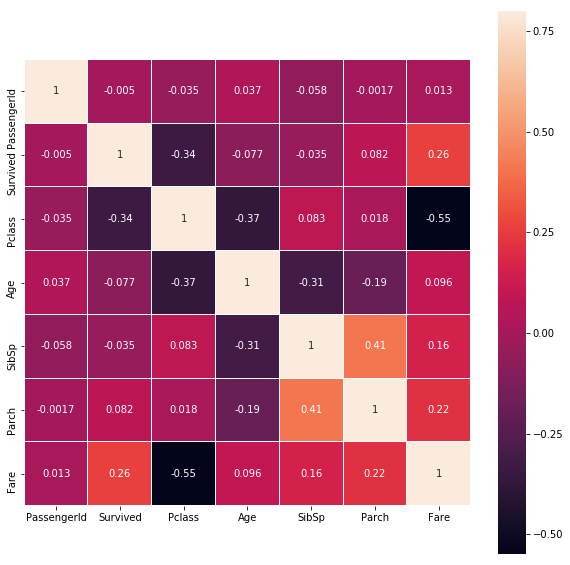

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),square=True,annot=True,linewidths=.01,linecolor='white',vmax=.8)

In [19]:
train.corr()['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

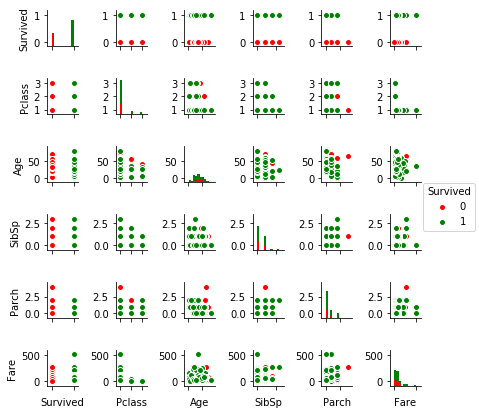

In [20]:
surv_col = 'green'
nosurv_col = 'red'
cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
g = sns.pairplot(data = train.dropna(),hue = 'Survived', vars = cols,palette= [nosurv_col,surv_col],size=1)
g.set(xticklabels=[])


In [48]:
plt.figure(figsize=(8,8))
sns.violinplot(train.Embarked,'Age',hue = 'Survived',data=train,split = True,dodge=True)

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [22]:
# train['Deck'] = train['Cabin'].str[0]
# # train['Deck'].unique()
# test['Deck'] = test['Cabin'].str[0]
# test['Deck'].unique()

In [23]:
# g = sns.factorplot("Survived", col="Deck", col_wrap=4,
#                     data=train[train.Deck.notnull()],
#                     kind="count", size=2.5, aspect=.8);


## transforming features 

In [24]:
def simplify_ag(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1,0,5,12,18,25,35,60,120)
    grp_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=grp_names)
    df.Age = categories
    return df
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df
def format_name(df):
    df['lname'] = df.Name.apply(lambda x: x.split(' ')[0]) 
    df['nameprefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df
def drop_features(df):
    return df.drop(['Name','Ticket','Embarked'],axis =1)
def transform_features(df):
    df = simplify_ag(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df
train = transform_features(train)
test = transform_features(test)



In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,lname,nameprefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


## Final Encoding 

In [26]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'lname', 'nameprefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
train, test = encode_features(train, test)
train.shape

(891, 11)

### split the data 

In [27]:
from sklearn.model_selection import train_test_split 
X_all = train.drop(['Survived','PassengerId'],axis = 1)
y_all = train['Survived']
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)


In [28]:
X_all.shape,y_all.shape

((891, 9), (891,))

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((712, 9), (179, 9), (712,), (179,))

## fitting The model 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [31]:

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
pred = clf.predict(X_test)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [33]:
accuracy_score(y_test,pred)

0.83240223463687146

### Other models

In [34]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

97.469999999999999

In [35]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

78.650000000000006

In [36]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

77.390000000000001

In [37]:
# Perceptron
import warnings
warnings.filterwarnings("ignore")
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

61.100000000000001

In [38]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

79.209999999999994

In [39]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

62.920000000000002

### validate with KFOLD 

In [40]:
from sklearn.cross_validation import KFold,cross_val_score
k_range = list(range(1,11))
scores = []
for k in k_range:
        clf.fit(X_train,y_train)
        preds = clf.predict(X_test) 
        acc = accuracy_score(y_test,preds)
        scores.append(acc)
        print('fold {}, accuracy {:.3f}'.format(k,acc))
print(np.mean(scores))

fold 1, accuracy 0.827
fold 2, accuracy 0.810
fold 3, accuracy 0.810
fold 4, accuracy 0.821
fold 5, accuracy 0.810
fold 6, accuracy 0.821
fold 7, accuracy 0.816
fold 8, accuracy 0.838
fold 9, accuracy 0.827
fold 10, accuracy 0.816
0.819553072626


In [41]:
from sklearn.cross_validation import KFold
def run_kfold(clf):
    kf = KFold(891,n_folds = 10)
    outcome = []
    fold =0
    for train_index,test_index in kf:
        
        fold+=1
        X_train,X_test = X_all.values[train.index],X_all.values[test.index]
        y_train,y_test = y_all.values[train.index],y_all.values[test.index]
        clf.fit(X_train,y_train)
        preds = clf.predict(X_test) 
        acc = accuracy_score(y_test,preds)
        outcome.append(acc)
        print('fold {}, accuracy {:.3f}'.format(fold,acc))
    meanoutcome = np.mean(outcome)
    print('mean acc{:.3f}'.format(meanoutcome))
    
run_kfold(clf)

fold 1, accuracy 0.880
fold 2, accuracy 0.864
fold 3, accuracy 0.861
fold 4, accuracy 0.856
fold 5, accuracy 0.854
fold 6, accuracy 0.856
fold 7, accuracy 0.880
fold 8, accuracy 0.876
fold 9, accuracy 0.885
fold 10, accuracy 0.876
mean acc0.869


### predict the actual dataset 

In [42]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'lname', 'nameprefix'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'lname', 'nameprefix'],
      dtype='object')


In [43]:
ids = test['PassengerId']
predictions = clf.predict(test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('c:/users/HP/Desktop/titanic-predictions2.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [44]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'lname', 'nameprefix'],
      dtype='object')